# Derivatives
 Thien Dong Nhat, modified 2023

## 1. Mathematical definition of a derivative

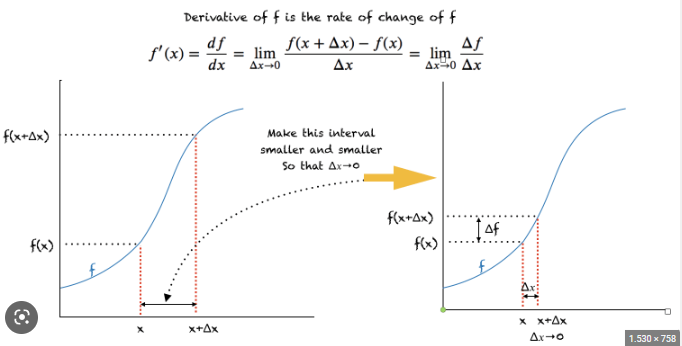

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
  return np.sin(x)*x - 1/100*x**3

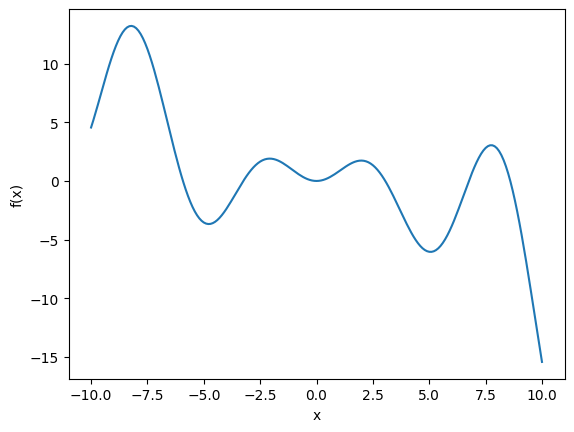

In [ ]:
x_list = np.linspace(-10,10,201)
y_list = f(x_list)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_list, y_list)
plt.show()

Let's check the derivative by analytical method

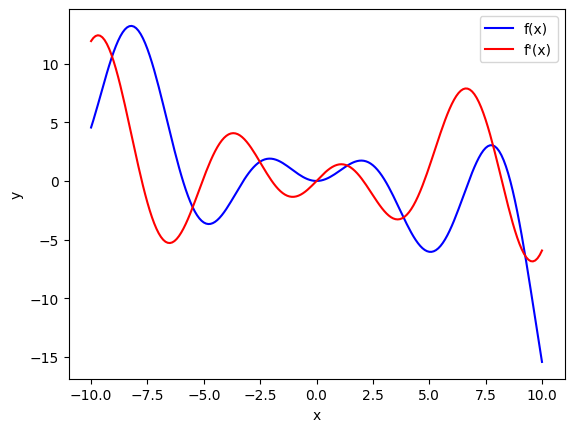

In [ ]:
x_list = np.linspace(-10,10,201)
analytical_derivative_list = np.cos(x_list)*x_list + np.sin(x_list) + 3/100*x_list**2

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_list, y_list, label="f(x)", color="blue")
plt.plot(x_list, analytical_derivative_list, label="f'(x)", color="red")
plt.legend()
plt.show()

Let's compare with derivative by numerical method

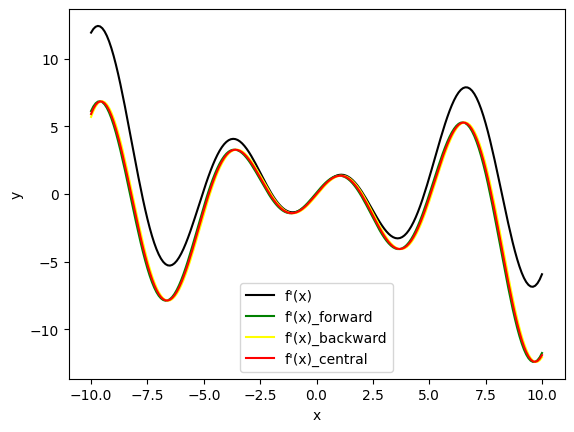

In [ ]:
x_list = np.linspace(-10,10,201)
analytical_derivative_list = np.cos(x_list)*x_list + np.sin(x_list) + 3/100*x_list**2

h = 0.1
forward_d_list = ( f(x_list + h) - f(x_list) ) / h
backward_d_list = ( f(x_list) - f(x_list - h) ) / h
central_d_list = ( f(x_list + h) - f(x_list - h) ) / (2*h)


plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_list, analytical_derivative_list, label="f'(x)", color="black")
plt.plot(x_list, forward_d_list, label="f'(x)_forward", color="green")
plt.plot(x_list, backward_d_list, label="f'(x)_backward", color="yellow")
plt.plot(x_list, central_d_list, label="f'(x)_central", color="red")

plt.legend()
plt.show()

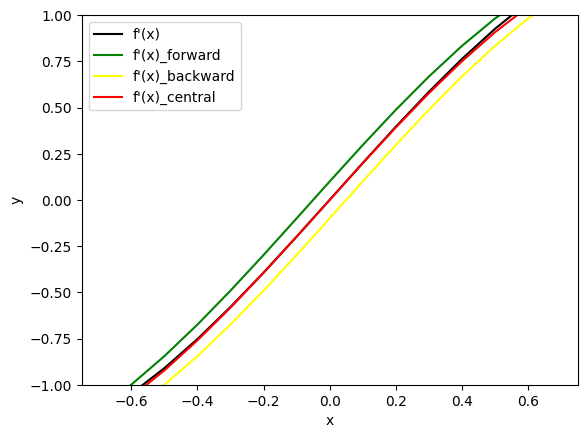

In [ ]:
x_list = np.linspace(-10,10,201)
analytical_derivative_list = np.cos(x_list)*x_list + np.sin(x_list) + 3/100*x_list**2

h = 0.1
forward_d_list = ( f(x_list + h) - f(x_list) ) / h
backward_d_list = ( f(x_list) - f(x_list - h) ) / h
central_d_list = ( f(x_list + h) - f(x_list - h) ) / (2*h)


plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_list, analytical_derivative_list, label="f'(x)", color="black")
plt.plot(x_list, forward_d_list, label="f'(x)_forward", color="green")
plt.plot(x_list, backward_d_list, label="f'(x)_backward", color="yellow")
plt.plot(x_list, central_d_list, label="f'(x)_central", color="red")

plt.xlim(-0.75,0.75)
plt.ylim(-1,1)

plt.legend()
plt.show()

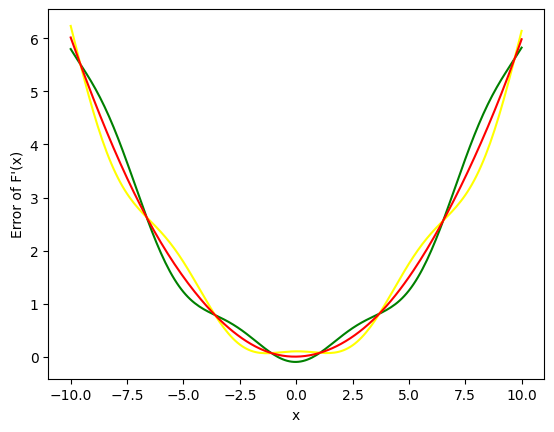

In [ ]:
plt.xlabel("x")
plt.ylabel("Error of F'(x)")

plt.plot(x_list, analytical_derivative_list - forward_d_list, label="f'(x)_forward", color="green")
plt.plot(x_list, analytical_derivative_list - backward_d_list, label="f'(x)_backward", color="yellow")
plt.plot(x_list, analytical_derivative_list - central_d_list, label="f'(x)_central", color="red")

The central derivative does match up in a high extended level with analytical derivative

### Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. Why?

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)


- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

### Higher accuracy:

In order to increase accuracy: we could decrease h (step size) to approximate the derivative. Howerver, in real life, we cannot control the step size h as it is a two recorded data points. Therefore, instead of taking into consideration the next two points, we can include more points together

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\) 

Take into acount 4 points together next to the value we want to calculate x (x-2h, x-h, x, x+h, x+2h)

In [ ]:
def D1Richardson(f, x, h):
  # f: function
  # x: argurment
  # h: stepsize
  return 1/(12*h) * (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h))

(-2.0, 2.0)

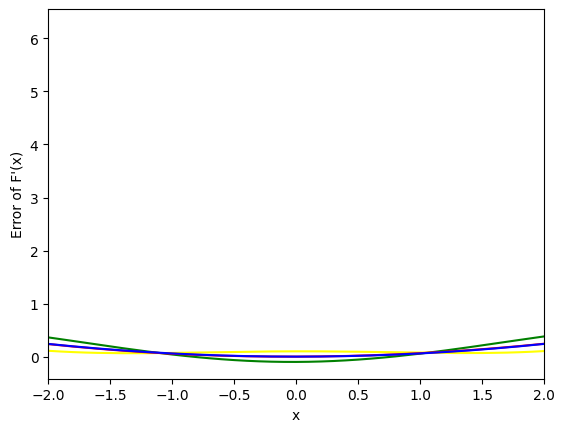

In [ ]:
plt.xlabel("x")
plt.ylabel("Error of F'(x)")

plt.plot(x_list, analytical_derivative_list - forward_d_list, label="f'(x)_forward", color="green")
plt.plot(x_list, analytical_derivative_list - backward_d_list, label="f'(x)_backward", color="yellow")
plt.plot(x_list, analytical_derivative_list - central_d_list, label="f'(x)_central", color="red")
plt.plot(x_list, analytical_derivative_list - D1Richardson(f, x_list, h), label="Richardson", color="blue")
plt.xlim([-2,2])

### Even higher accuracy

Iteration formula:

\\(D_{n+1}=\frac{2^{2n}D_n(h)-D_n(2h)}{2^{2n}-1}\\)

In [ ]:
def D1Richardson(f, x, h):
  # f: function
  # x: argurment
  # h: stepsize
  return 1/(12*h) * (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h))


def D1nRichardson(nmax, f, x, h):
  # nmax: order of interation for 1st derivative
  # f: function
  # x: argurment
  # h: stepsize
  d0 =  np.array([1/(12*h*2**j) * (f(x - 2*h*2**j) - 8*f(x - h*2**j) + 8*f(x + h*2**j) - f(x + 2*h*2**j)) for j in range(0,nmax)])
  for n in range(1, nmax):
    print(d0)
    d = np.array([(2**(2*n) * d0[j] - d0[j+1]) / (2**(2*n) - 1) for j in range(0, len(d0) - 1)])
    d0 = d
  
  return d


Calculate f'(x) for \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\) at \\(x = 3\\)

In [ ]:
D1nRichardson(5, f, 3, h)

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]


array([-3.09885748])

Comparison to D1Richardson

In [ ]:
D1Richardson(f, 3, h)

-3.0988499416783317

Analytical result: \\( f'(3)=3\cos(3)+\sin(3)-\frac{3}{100}\cdot 3^2 \\)

In [ ]:
3*np.cos(3) + np.sin(3) - 3/100 * 3**2

-3.098857481741469

## 3. Second derivatives

We derive \\(f'(x)\\) another time

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x)-f'(x-h)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x-h)}{2h}\\)

This gives us many possibilities for the definition of \\(f''(x)\\) based on \\(f(x)\\), e. g.

- Double forward & double backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\\)

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}\\)

- Forward and backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\)

- Double central (same result as forward and backward for \\(2h=g\\))

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}\\)

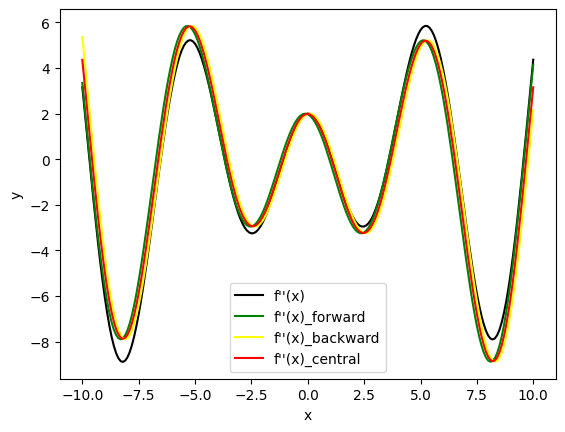

In [ ]:
x_list = np.linspace(-10,10,201)
#analytical_derivative_list = np.cos(x_list)*x_list + np.sin(x_list) + 3/100*x_list**2
analytical_d2_list = np.cos(x_list) - np.sin(x_list)*x_list + np.cos(x_list) + 6/100*x_list
h = 0.1
forward_d2_list = ( f(x_list + 2*h) - 2*f(x_list + h) + f(x_list) ) / h**2
backward_d2_list = ( f(x_list) - 2*f(x_list - h) + f(x_list -2*h) ) / h**2
central_d2_list = ( f(x_list + 2*h) - 2*f(x_list) + f(x_list - 2*h) ) / (4*h**2)


plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_list, analytical_d2_list, label="f''(x)", color="black")
plt.plot(x_list, forward_d2_list, label="f''(x)_forward", color="green")
plt.plot(x_list, backward_d2_list, label="f''(x)_backward", color="yellow")
plt.plot(x_list, central_d2_list, label="f''(x)_central", color="red")

#plt.xlim(-0.75,0.75)
#plt.ylim(-1,1)

plt.legend()
plt.show()

### Higher accuracy:

Richardson: \\(f''(x)=\frac{1}{12h^2}\left[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [ ]:
def D2Richardson(f, x, h):
  # f: function
  # x: argurment
  # h: stepsize
  return 1/(12*h**2) * (-f(x - 2*h) + 16*f(x - h) -30*f(x) + 16*f(x + h) - f(x + 2*h))

(-2.0, 2.0)

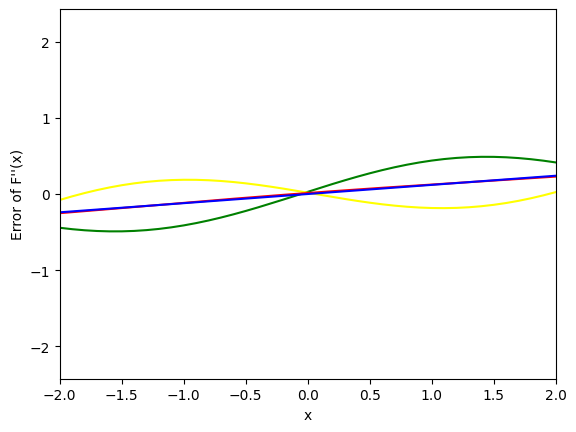

In [ ]:
plt.xlabel("x")
plt.ylabel("Error of F''(x)")

plt.plot(x_list, analytical_d2_list - forward_d2_list, label="f''(x)_forward", color="green")
plt.plot(x_list, analytical_d2_list - backward_d2_list, label="f''(x)_backward", color="yellow")
plt.plot(x_list, analytical_d2_list - central_d2_list, label="f''(x)_central", color="red")
plt.plot(x_list, analytical_d2_list - D2Richardson(f, x_list, h), label="D2 Richardson", color="blue")
plt.xlim([-2,2])

### Exercises: Calculate velocity and acceleration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = np.loadtxt("/content/drive/MyDrive/DataScience_Self_Learning/NumericalMethods/04b_Exercise_velocity_acceleration_data_file.dat")

In [ ]:
data.shape

(1001, 2)

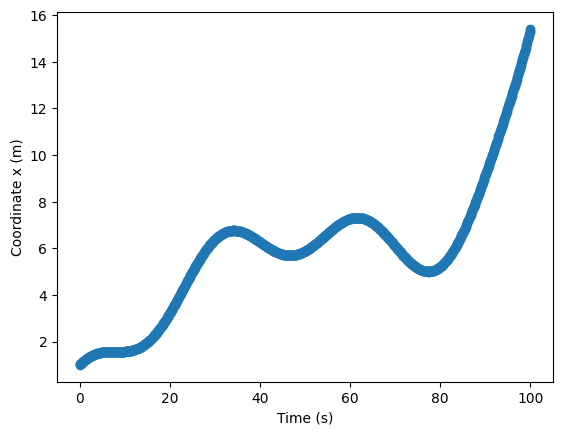

In [ ]:
plt.xlabel("Time (s)")
plt.ylabel("Coordinate x (m)")
plt.scatter(data[:,0], data[:,1])

Calculate velocoty & acceleration by Forward method

In [ ]:
np.zeros(len(data[:,1]))[:-1].shape

(1000,)

In [ ]:
def forward(data):
  derive = np.zeros(len(data[:,1]))
  # Calculate the derivative from the first point to n-1 point using forward derivative
  derive[:-1] = (data[1:,1] - data[:-1,1]) / (data[1:,0] - data[:-1,0])
  # Calculate the derivative for the last n point using backward derivative
  derive[-1] = (data[-1,1] - data[-2,1]) / (data[-1,0] - data[-2,0])
  return np.transpose([data[:,0], derive])

In [ ]:
velocityForward = forward(data=data)
accelerationForward = forward(forward(data))

Calculate velocity & acceleration by Central method

In [ ]:
def central(data):
  derive = np.zeros(len(data[:,1]))
  # The first derivative will use forward method
  derive[0] = (data[1,1] - data[0,1]) / (data[1,0] - data[0,0])
  # The last derivative will use backward method
  derive[-1] = (data[-1,1] - data[-2,1]) / (data[-1,0] - data[-2,0])
  # The remaining will use central method
  derive[1:-1] = (data[2:,1] - data[0:-2,1]) / (data[2:,0] - data[0:-2,0])
  return np.transpose([data[:,0], derive])

Calculate velocity & accelaration using Backward method

In [ ]:
def backward(data):
  derive = np.zeros(len(data[:,1]))
  # Calculate the first term using forward method
  derive[0] = (data[1,1] - data[0,1]) / (data[1,0] - data[0,0])
  # The remaining using backward method
  derive[1:] = (data[1:,1] - data[0:-1,1]) / (data[1:,0] - data[0:-1,0])
  return np.transpose([data[:,0], derive])

Calculate velocity & acceleration using Richardson method

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\) 

In [ ]:
def Richardson(data):
  derive = np.zeros(len(data[:,1]))
  # The first two points using forward method
  derive[0:2] = (data[1:3,1] - data[0:2,1]) / (data[1:3,0] - data[0:2,0])
  # The last two points using backward method
  derive[2:-2] = (-data[4:,1] + 8*data[3:-1,1] - 8*data[1:-3,1] + data[:-4,1]) / (12*(data[3:-1,0] - data[2:-2,0]))
  # The remaining
  derive[-2] = (data[-2,1] - data[-3,1]) / (data[-2,0] - data[-3,1])
  derive[-1] = (data[-1,1] - data[-2,1]) / (data[-1,0] - data[-2,0])

In [ ]:
velocityForward = forward(data=data)
accelerationForward = forward(forward(data))
velocityBackward = backward(data)
accelerationBackward = backward(backward(data))
velocityCentral = central(data)
accelerationCentral = central(central(data))
velocityRichardson = Richardson(data)


## 4. Gradient, Divergence & Curl

Now we consider a multidimensional function which means, the function depends on multiple variables 

\\( f(x,y,z)\\)

or it is a function that has multiple dimensions itself

\\( \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}\\)

With the nabla operator \\( \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}\\) we can calculate:

- gradient \\( \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}\\)

- curl \\(\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\\end{pmatrix}\\)

- divergence \\(\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)\\)

### Example 

\\(f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4)\\)

\\(\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}\\)

In [ ]:
def f(r):
  # r: vector that has (x,y,z)
    return np.exp(-r[0]**2-r[1]**4)

def g(r):
  # r: vector that has (x,y,z)
    return r / np.linalg.norm(r)

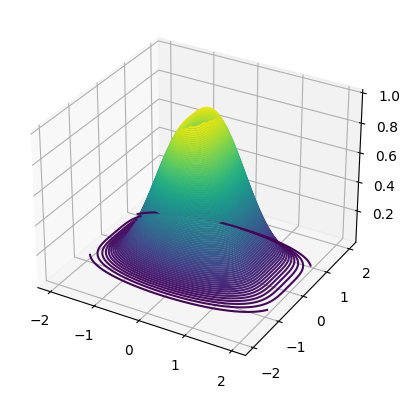

In [ ]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

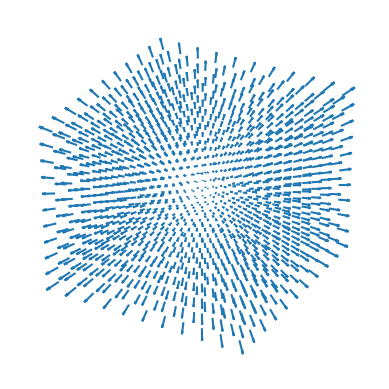

In [ ]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

### Gradient

In [ ]:
def gradient(f, r, h):
  x,y,z = r
  partialx = ( f(np.array([x+h,y,z])) - f(np.array([x-h,y,z])) ) / (2*h)
  partialy = ( f(np.array([x,y+h,z])) - f(np.array([x,y-h,z])) ) / (2*h)
  partialz = ( f(np.array([x,y,z+h])) - f(np.array([x,y,z-h])) ) / (2*h)
  return np.array([partialx, partialy, partialz])

In [ ]:
def f(r):
  # r: vector that has (x,y,z)
    return np.exp(-r[0]**2-r[1]**4)

In [ ]:
r = np.array([0.5,-1.2, -8])
h = 0.0001

gradient(f, r, h)

array([-0.09792044,  0.67682606,  0.        ])

- analytical solution 

\\( \nabla f(x,y,z) = \begin{pmatrix}-2x\exp(-x^2-y^4)\\-4y^3\exp(-x^2-y^4)\\0\end{pmatrix} \\)

### Divergence

In [ ]:
def g(r):
  # r: vector that has (x,y,z)
    return r / np.linalg.norm(r)

In [ ]:
def divergence(g, r, h):
  x, y, z = r
  dgxdx = ( g(np.array([x+h,y,z]))[0] - g(np.array([x-h,y,z]))[0] ) / (2*h)
  dgxdy = ( g(np.array([x,y+h,z]))[1] - g(np.array([x,y-h,z]))[1] ) / (2*h)
  dgxdz = ( g(np.array([x,y,z+h]))[2] - g(np.array([x,y,z-h]))[2] ) / (2*h)

  return dgxdx + dgxdy + dgxdz


In [ ]:
divergence(g, r, h)

0.24676318364020428

- analytical solution 

\\( \nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} \\)

### Curl

- curl \\(\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\\end{pmatrix}\\)

In [ ]:
def g(r):
  # r: vector that has (x,y,z)
    return r / np.linalg.norm(r)

In [ ]:
def curl(g, r, h):
  x, y, z = r
  curl_x = ( g(np.array([x,y+h,z]))[2] - g(np.array([x,y-h,z]))[2] ) / (2*h) - ( g(np.array([x,y,z+h]))[1] - g(np.array([x,y,z-h]))[1] ) / (2*h)
  curl_y = ( g(np.array([x,y,z+h]))[0] - g(np.array([x,y,z-h]))[0] ) / (2*h) - ( g(np.array([x+h,y,z]))[2] - g(np.array([x-h,y,z]))[2] ) / (2*h)
  curl_z = ( g(np.array([x+h,y,z]))[1] - g(np.array([x-h,y,z]))[1] ) / (2*h) - ( g(np.array([x,y+h,z]))[0] - g(np.array([x,y-h,z]))[0] ) / (2*h)
  return np.array([curl_x, curl_y, curl_z])

In [ ]:
curl(g, r, h)

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])

- analytical solution 

\\( \nabla \times \vec{g}(\vec{r}) = 0 \\)